In [1]:
import os

print(os.listdir("D:\Pneumonia Detection\chest_xray"))

['chest_xray', 'test', 'train', 'val', '__MACOSX']


In [2]:
from pathlib import Path

data_dir = Path("D:\Pneumonia Detection\chest_xray\chest_xray")

In [3]:
train_dir = data_dir / 'train'
val_dir = data_dir / 'val'
test_dir = data_dir / 'test'

In [4]:
import glob
import pandas as pd
 
train_normal_dir = train_dir / 'NORMAL'
train_pneumonia_dir = train_dir / 'PNEUMONIA'

normal_cases = train_normal_dir.glob('*jpeg')
pneumonia_cases = train_pneumonia_dir.glob('*jpeg')

train_data = []
for img in normal_cases:
    train_data.append((img, 0))
for img in pneumonia_cases:
    train_data.append((img, 1))

train_df = pd.DataFrame(train_data, columns = ['Image Path', 'Label'], index = None)
train_df = train_df.sample(frac = 1.).reset_index(drop = True)
train_df.head(10)

,Image Path,Label
0,D:\Pneumonia Detection\chest_xray\chest_xray\t...,1
1,D:\Pneumonia Detection\chest_xray\chest_xray\t...,1
2,D:\Pneumonia Detection\chest_xray\chest_xray\t...,1
3,D:\Pneumonia Detection\chest_xray\chest_xray\t...,1
4,D:\Pneumonia Detection\chest_xray\chest_xray\t...,1
5,D:\Pneumonia Detection\chest_xray\chest_xray\t...,1
6,D:\Pneumonia Detection\chest_xray\chest_xray\t...,0
7,D:\Pneumonia Detection\chest_xray\chest_xray\t...,1
8,D:\Pneumonia Detection\chest_xray\chest_xray\t...,0
9,D:\Pneumonia Detection\chest_xray\chest_xray\t...,1


1    3875
0    1341
Name: Label, dtype: int64


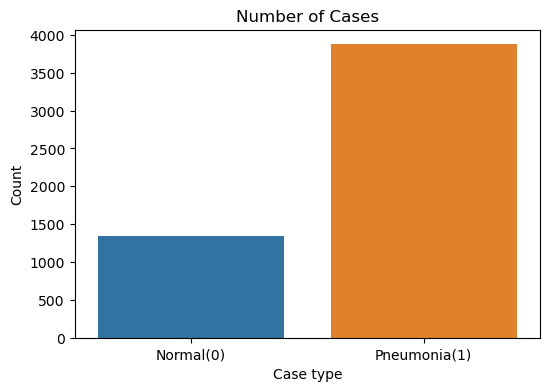

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

case_count = train_df['Label'].value_counts()
print(case_count)
plt.figure(figsize = (6, 4))
sns.barplot(x = case_count.index, y = case_count.values)
plt.title('Number of Cases')
plt.xlabel('Case type')
plt.ylabel('Count')
plt.xticks(range(len(case_count.index)), ['Normal(0)', 'Pneumonia(1)'])
plt.show()

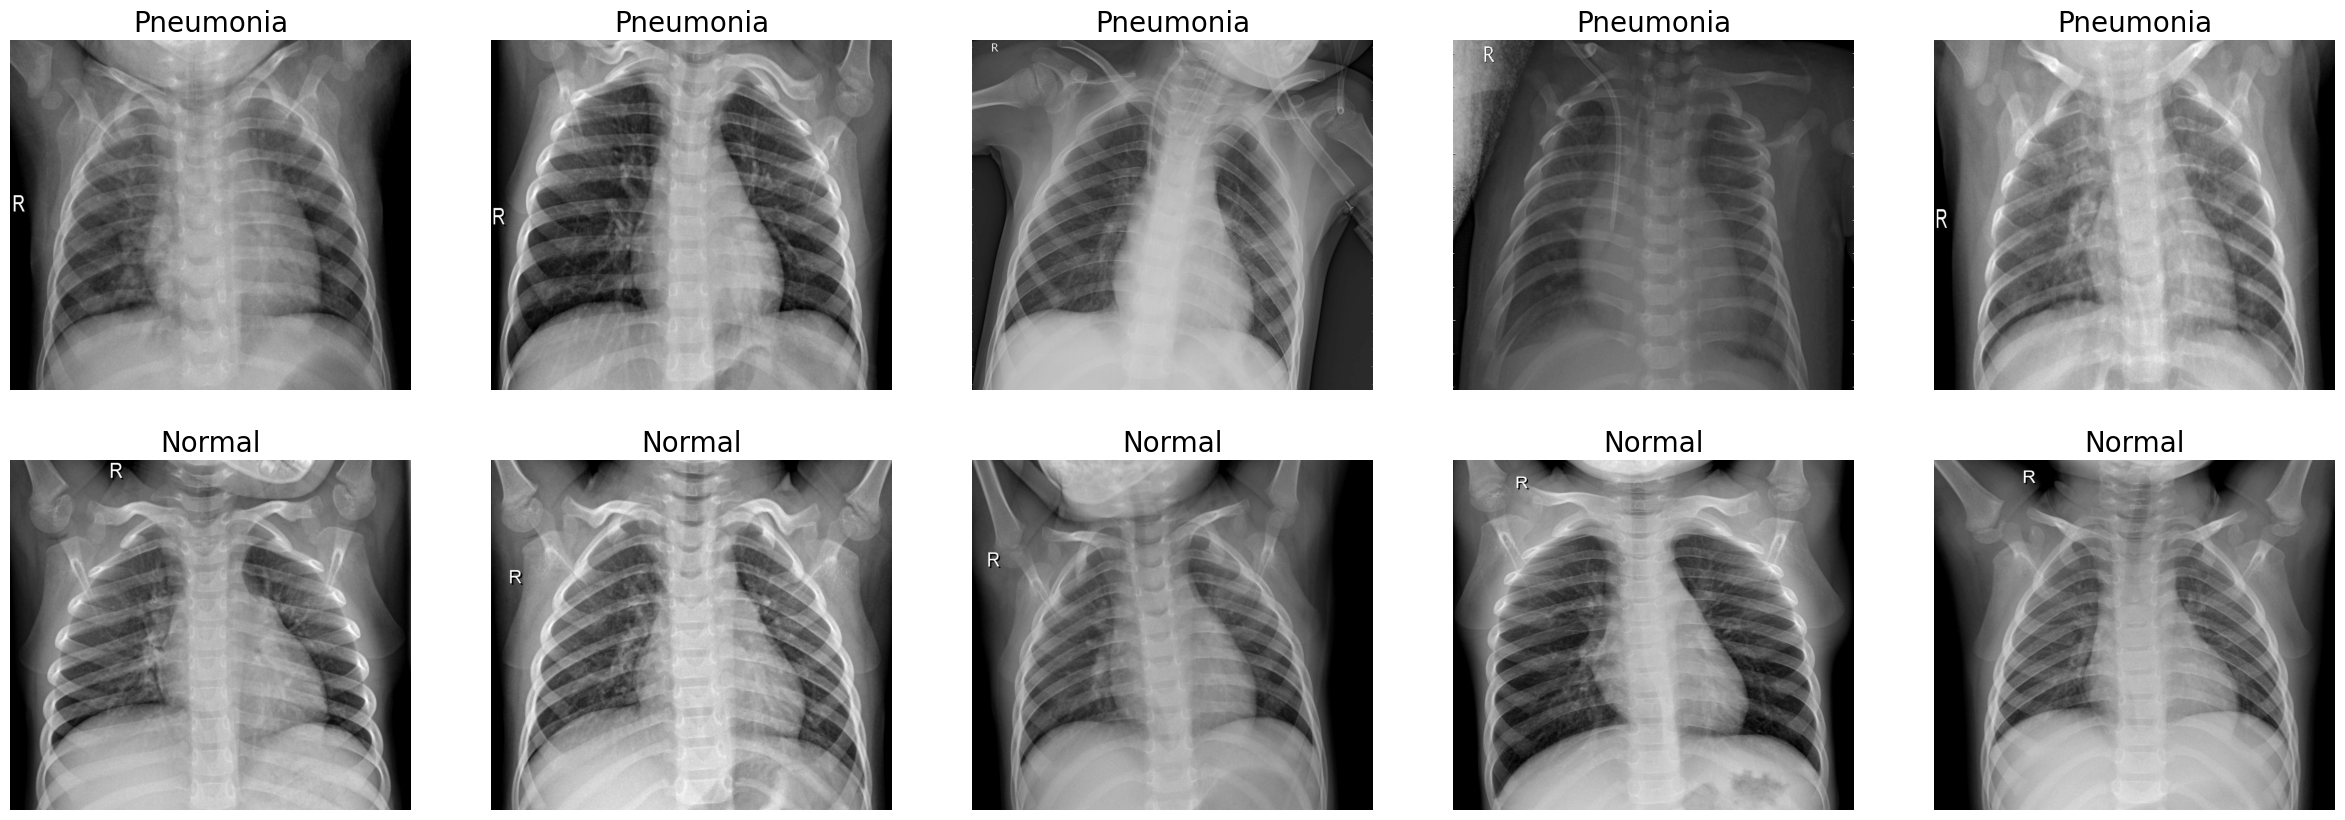

In [6]:
from skimage.io import imread

samples_pneumonia = (train_df[train_df['Label'] == 1]['Image Path'].iloc[:5]).tolist()
samples_normal = (train_df[train_df['Label'] == 0]['Image Path'].iloc[:5]).tolist()

total_samples = samples_pneumonia + samples_normal
del samples_pneumonia, samples_normal

f, ax = plt.subplots(2, 5, figsize=(30,10))
for i in range(0, 10):
    img = imread(total_samples[i])
    ax[i // 5, i % 5].imshow(img, cmap='gray')
    if i < 5:
        ax[i // 5, i % 5].set_title("Pneumonia", size=20)
    else:
        ax[i // 5, i % 5].set_title("Normal", size=20)
    ax[i // 5, i % 5].axis('off')
    ax[i // 5, i % 5].set_aspect('auto')

plt.show()

In [7]:
import cv2
import numpy as np

labels = ['PNEUMONIA', 'NORMAL']
img_size = 150

def prepare_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [8]:
train = prepare_training_data(train_dir)
val = prepare_training_data(val_dir)
test = prepare_training_data(test_dir)

OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



C:\Users\vaibh\AppData\Local\Temp\ipykernel_12840\3704818700.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



In [9]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)

In [10]:
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [11]:
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [12]:
import keras
from keras.preprocessing.image import ImageDataGenerator

generate_data = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range = 30,
        zoom_range = 0.2,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip = True,
        vertical_flip=False)


generate_data.fit(x_train)

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint

model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 75, 75, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 75, 75, 64)       2

In [14]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [15]:
checkpoint = ModelCheckpoint('model-{epoch:03d}-{accuracy:03f}-{val_accuracy:03f}.h5', 
                             verbose=1, 
                             monitor='val_accuracy',
                             save_best_only=True, 
                             mode='max') 

In [16]:
history = model.fit(generate_data.flow(x_train,y_train, batch_size = 32), 
                    epochs = 20, 
                    validation_data = generate_data.flow(x_val, y_val), 
                    callbacks = [checkpoint, learning_rate_reduction])

Epoch 1/20
163/163 [==============================] - ETA: 0s - loss: 0.4874 - accuracy: 0.8413
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to model-001-0.841258-0.500000.h5
163/163 [==============================] - 132s 801ms/step - loss: 0.4874 - accuracy: 0.8413 - val_loss: 30.6799 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/20
163/163 [==============================] - ETA: 0s - loss: 0.2668 - accuracy: 0.8961
Epoch 2: val_accuracy did not improve from 0.50000
163/163 [==============================] - 135s 831ms/step - loss: 0.2668 - accuracy: 0.8961 - val_loss: 51.6721 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/20
163/163 [==============================] - ETA: 0s - loss: 0.2244 - accuracy: 0.9206
Epoch 3: val_accuracy did not improve from 0.50000

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
163/163 [==============================] - 151s 926ms/step - loss: 0.2244 - accuracy: 0.9206 - val_loss: 21.0501 - val_accuracy: 0.5000

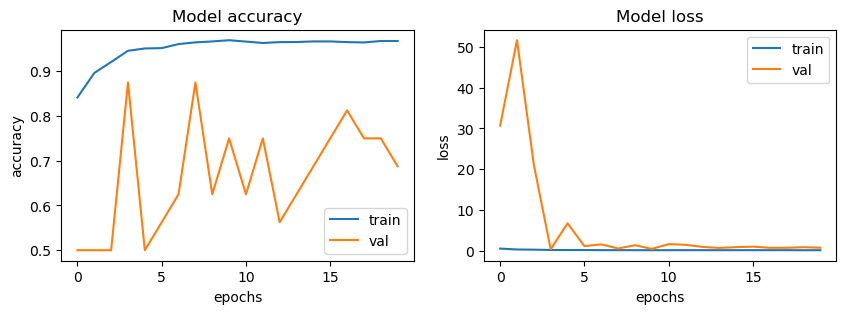

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [18]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

20/20 [==============================] - 3s 160ms/step - loss: 0.2693 - accuracy: 0.9038
Loss of the model is -  0.269303560256958
20/20 [==============================] - 3s 158ms/step - loss: 0.2693 - accuracy: 0.9038
Accuracy of the model is -  90.38461446762085 %


In [23]:
predictions = (model.predict(x_test) > 0.5).astype("int32")
predictions = predictions.reshape(1,-1)[0]
predictions[:15]

20/20 [==============================] - 3s 170ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [24]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test, predictions, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.94      0.91      0.92       390
   Normal (Class 1)       0.85      0.90      0.88       234

           accuracy                           0.90       624
          macro avg       0.90      0.90      0.90       624
       weighted avg       0.91      0.90      0.90       624



In [25]:
cm = confusion_matrix(y_test, predictions)
cm

array([[354,  36],
       [ 24, 210]], dtype=int64)

In [26]:
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])

<AxesSubplot:>

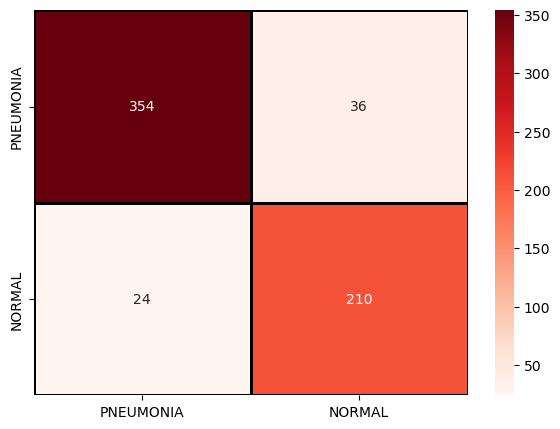

In [29]:
plt.figure(figsize = (7, 5))
sns.heatmap(cm,cmap= "Reds", 
            linecolor = 'black' , 
            linewidth = 1 , 
            annot = True, 
            fmt='',
            xticklabels = labels,
            yticklabels = labels)

In [30]:
correct = np.nonzero(predictions == y_test)[0]
incorrect = np.nonzero(predictions != y_test)[0]

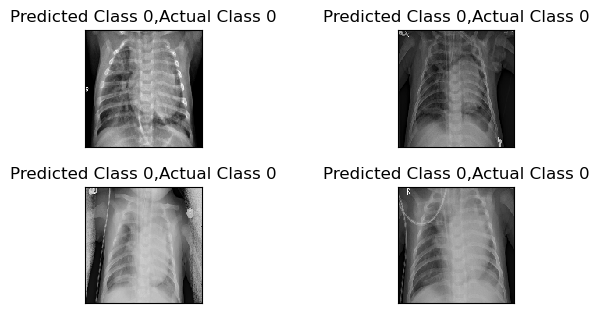

In [37]:
i = 0
for c in correct[:4]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

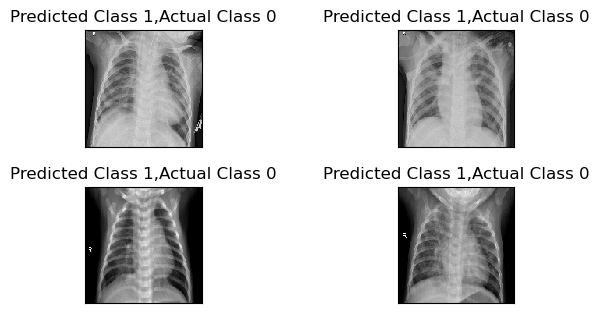

In [35]:
i = 0
for c in incorrect[:4]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1